In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data and Prep

In [11]:
from sklearn.datasets import load_breast_cancer

In [50]:
cancer_dictionary = load_breast_cancer()

In [51]:
cancer_dictionary.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [49]:
# print(cancer_dictionary.DESCR)

In [13]:
# read the dataframe, first using the feature data
df = pd.DataFrame(cancer_dictionary['data'], columns=cancer_dictionary['feature_names'])

In [14]:
# add a target column, and fill it with target data
# df['target'] = cancer_dictionary['target']

In [15]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We can see that even if we plot out the current 30 features, it is hard to interpret the relationship as seen in below heatmap.

So what we want to do is apply PCA and reduce the dimensions (transformation, not selecting the subset of the dataset).

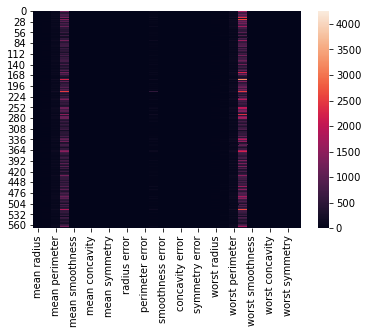

In [17]:
sns.heatmap(df);

---------

# 1) Scale the data

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler  = StandardScaler()

In [20]:
scaled_X = scaler.fit_transform(df)

In [26]:
scaled_X.mean(axis=0) # check the mean of scaled_X

array([-3.16286735e-15, -6.53060890e-15, -7.07889127e-16, -8.79983452e-16,
        6.13217737e-15, -1.12036918e-15, -4.42138027e-16,  9.73249991e-16,
       -1.97167024e-15, -1.45363120e-15, -9.07641468e-16, -8.85349205e-16,
        1.77367396e-15, -8.29155139e-16, -7.54180940e-16, -3.92187747e-16,
        7.91789988e-16, -2.73946068e-16, -3.10823423e-16, -3.36676596e-16,
       -2.33322442e-15,  1.76367415e-15, -1.19802625e-15,  5.04966114e-16,
       -5.21317026e-15, -2.17478837e-15,  6.85645643e-16, -1.41265636e-16,
       -2.28956670e-15,  2.57517109e-15])

# 2) Calculate Covariance Matrix

In [27]:
# we are only interested in Covariance among the features columns, so we will turn off for row variance.
covariance_matrix = np.cov(scaled_X, rowvar=False)

# 3) Calculate Eigen Values and Vectors

In [28]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [29]:
eigen_values # eigen values for each features

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 1.33279057e-04,
       7.50121413e-04, 1.59213600e-03, 6.91261258e-03, 8.19203712e-03,
       1.55085271e-02, 1.80867940e-02, 2.43836914e-02, 2.74877113e-02,
       3.12142606e-02, 3.00256631e-02])

In [30]:
eigen_vectors.shape

(30, 30)

In [38]:
eigen_vectors

array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
         4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
         1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
         9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
         1.19672116e-02, -5.95061348e-02, -5.11187749e-02,
         1.50583883e-01, -2.02924255e-01, -1.46712338e-01,
        -2.25384659e-01, -7.02414091e-01,  2.11460455e-01,
        -2.11194013e-01, -1.31526670e-01,  1.29476396e-01,
         1.92264989e-02, -1.82579441e-01,  9.85526942e-02,
        -7.29289034e-02, -4.96986642e-02,  6.85700057e-02],
       [ 1.03724578e-01, -5.97060883e-02,  6.45499033e-02,
        -6.03050001e-01,  4.94688505e-02, -3.21788366e-02,
        -1.13995382e-02, -1.30674825e-01,  1.12699390e-01,
         2.40934066e-01, -3.02243402e-01,  2.54896423e-01,
         2.03461333e-01,  2.15600995e-02, -1.07922421e-01,
         1.57841960e-01,  3.87061187e-02,  4.11029851e-02,
        -2.97886446e-02, -2.73661018e-04, -1.05339342e-

**NOTE:**
+ Currently we are converting N feature space into N Principal Components. However this is not superful as we still have the same number. Nothing is acutally been reduced.
+ So we have to decide How many Principal Component to choose? (Example: in this case 2, then we are going from 30 feature space to TOP 2 based on Eigen values).
+ we have to sort the eigen values.

# 4) Sort Eigen Values to choose TOP N number of Principal Components

In [32]:
# quick example for Argument Sorting (which returns the indices of the sorted array)
# we can see the returned indices are the in acending order (saying that get the item from index 1 (4), then item from index 0 (99), then item from index 2 (100)
# which is 4, 99, 100

np.argsort([99, 4, 100])

array([1, 0, 2], dtype=int64)

In [31]:
# define how many N TOP features we want.

num_components = 2

In [37]:
# get the sorted indices, but in decending order, then grab the TOP 2

sorted_key = np.argsort(eigen_values)[::-1][:num_components]
sorted_key

array([0, 1], dtype=int64)

# 5) Choose N largest Item Values

In [40]:
# now grab the associated values and vectors based on the sorted key indices
eigen_values, eigen_vectors = eigen_values[sorted_key], eigen_vectors[: , sorted_key]

Now we are down from 30 features space to TOP 2 values.

# 6) Project Original data onto Eigen Values

In [41]:
principal_components = np.dot(scaled_X, eigen_vectors)

In [42]:
principal_components

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

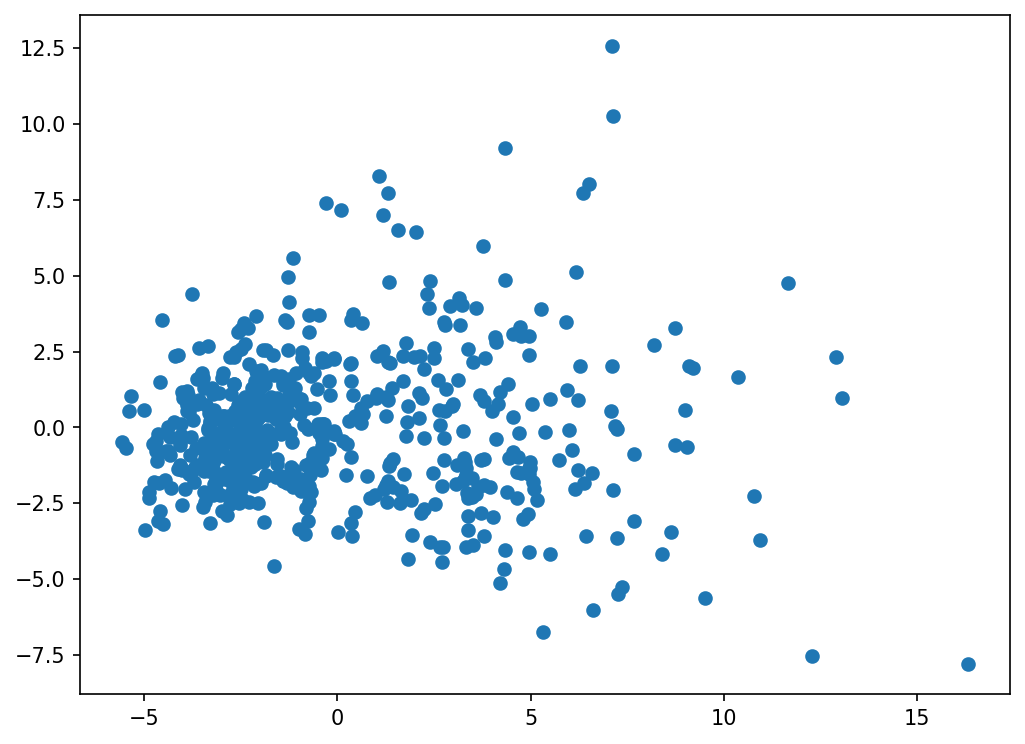

In [45]:
plt.figure(figsize=(8,6), dpi=150)
plt.scatter(principal_components[:, 0], principal_components[: , 1]);

------

### Visualizing with the target variables

As we have reduced from 30 features into 2 Principal Components, we want to know whether target predictions are still in tact.

We can do this by coloring with target values.

Based on the chart below, the separtion between benign and maglinant is almost perfect. Of course there are some overlapped points.

In conculsion, although we reduced down to 2 PC, the data are still separable (meaning information are still retained).

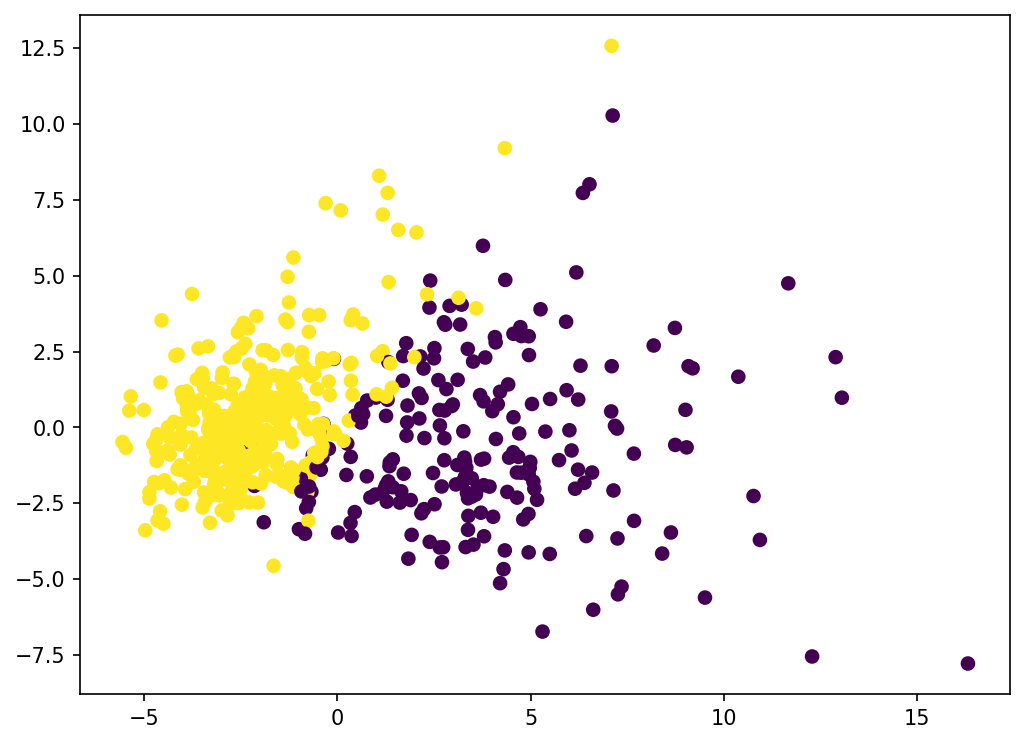

In [52]:
plt.figure(figsize=(8,6), dpi=150)
plt.scatter(principal_components[:, 0], principal_components[: , 1], c=cancer_dictionary['target']);